In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import r2_score

In [ ]:
test_data = pd.read_csv('test_hw.csv', sep=',')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,190,RL,75.0,10382,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2006,ConLD,Normal
1,2,20,RL,NaN,10708,Pave,NaN,IR1,Lvl,AllPub,...,142,0,NaN,GdWo,NaN,0,11,2009,COD,Normal
2,3,60,RL,NaN,24682,Pave,NaN,IR3,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,4,160,RM,42.0,3964,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal
4,5,20,RL,75.0,10125,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,160,RM,24.0,2016,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal
288,289,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
289,290,60,RL,44.0,9548,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,Normal
290,291,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal


In [491]:
train_data = pd.read_csv('train_hw.csv', sep=',')
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20,RL,NaN,8750,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,148500
1,2,160,RM,24.0,2368,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,125000
2,3,60,RL,80.0,9760,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,167900
3,4,120,RM,NaN,4500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,165000
4,5,80,RL,NaN,14112,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,180500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1164,60,RL,79.0,9245,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,213500
1164,1165,75,RL,60.0,6204,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,118500
1165,1166,70,RH,54.0,6629,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,103600
1166,1167,160,RM,32.0,3363,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,130000


In [492]:
cat_data = train_data.select_dtypes(include=['object'])

In [493]:
num_data = train_data.select_dtypes(exclude=['object'])


In [494]:
correlation_with_price = num_data.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
top_correlated = correlation_with_price.head(20)
print("Топ-15 признаков с наибольшей корреляцией:")
top_correlated

Топ-15 признаков с наибольшей корреляцией:


,SalePrice
SalePrice,1.000000
OverallQual,0.794936
GrLivArea,0.699296
GarageCars,0.633186
GarageArea,0.614240
TotalBsmtSF,0.613076
1stFlrSF,0.610451
FullBath,0.556587
YearBuilt,0.542835
TotRmsAbvGrd,0.531194


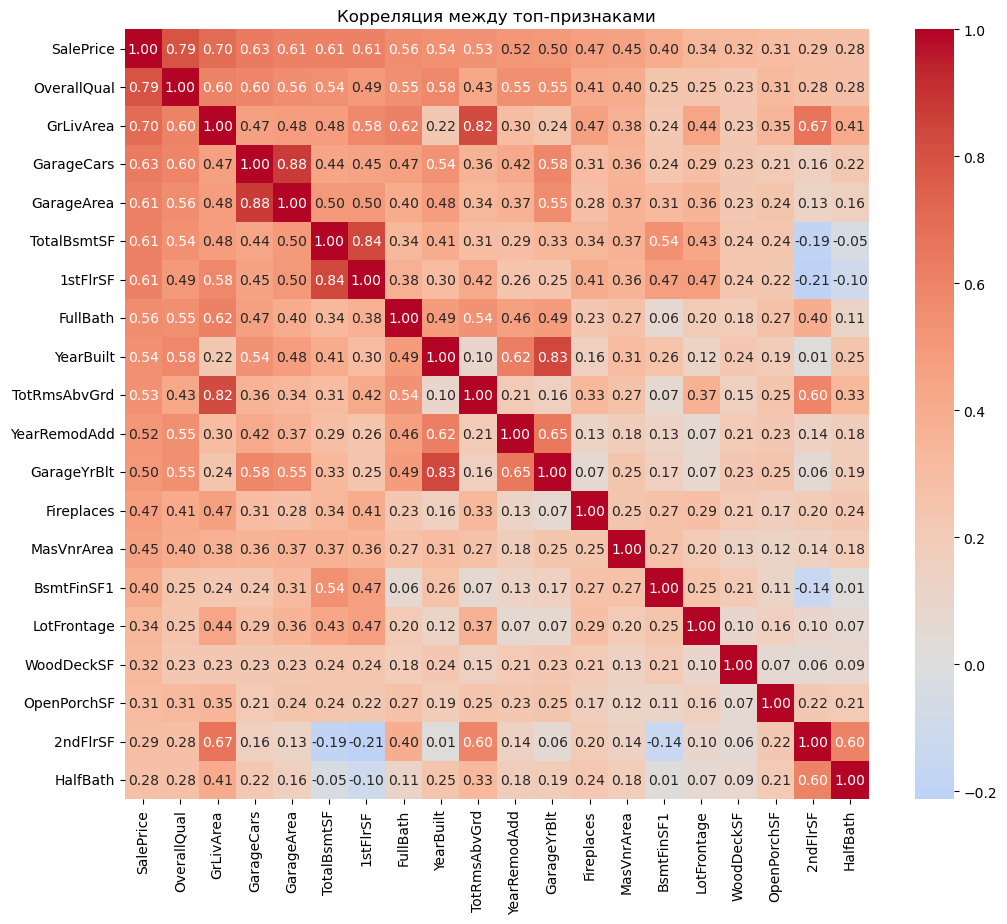

In [495]:
top_features = top_correlated.index.tolist()  # Список самых коррелирующих с ценой признаков
corr_matrix = num_data[top_features].corr()

# Визуализация
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Корреляция между топ-признаками')
plt.show()

In [ ]:
# возможно лучше убрать признаки которые слишком коррелируют


In [496]:
#топ столбцов с пустыми значениями 
nan_data = (train_data.isnull().mean() * 100).reset_index()
nan_data.columns = ["column_name", "percentage"]
nan_data.sort_values("percentage", ascending=False, inplace=True)
nan_data.head(10)

,column_name,percentage
72,PoolQC,99.400685
74,MiscFeature,96.318493
6,Alley,93.921233
73,Fence,81.678082
25,MasVnrType,59.417808
57,FireplaceQu,46.832192
3,LotFrontage,17.893836
63,GarageQual,5.650685
60,GarageFinish,5.650685
58,GarageType,5.650685


In [497]:
# удалтла столбцы в которых слтшком много пустых значений train , test
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType']
train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

In [498]:
cat_cols = train_data.select_dtypes(include=['object']).columns

# Заполняем пропуски модой (отдельно для train и test)
for col in cat_cols:
    train_mode = train_data[col].mode()[0]
    train_data[col] = train_data[col].fillna(train_mode)
    test_data[col] = test_data[col].fillna(train_mode)  # Важно: используем моду из train!

# Проверяем результат
print(train_data[cat_cols].isnull().sum())

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64


In [499]:
#заполняем медианой числовые признаки train, test
num_cols_train = train_data.select_dtypes(include=['int64', 'float64']).columns

if 'SalePrice' in num_cols_train:
    num_cols_train = num_cols_train.drop('SalePrice')

for col in num_cols_train:
    train_data[col] = train_data[col].fillna(train_data[col].median())

num_cols_test = test_data.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols_test:
    if col in num_cols_train:  
        test_data[col] = test_data[col].fillna(train_data[col].median())
    else:
        test_data[col] = test_data[col].fillna(test_data[col].median())

In [500]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20,RL,70.0,8750,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2009,WD,Normal,148500
1,2,160,RM,24.0,2368,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2009,WD,Normal,125000
2,3,60,RL,80.0,9760,Pave,Reg,Lvl,AllPub,Inside,...,0,0,189,0,0,6,2008,WD,Normal,167900
3,4,120,RM,70.0,4500,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,6,2009,WD,Normal,165000
4,5,80,RL,70.0,14112,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,180500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1164,60,RL,79.0,9245,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2007,WD,Normal,213500
1164,1165,75,RL,60.0,6204,Pave,Reg,Bnk,AllPub,Inside,...,0,0,0,0,0,3,2006,WD,Normal,118500
1165,1166,70,RH,54.0,6629,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2009,WD,Normal,103600
1166,1167,160,RM,32.0,3363,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Normal,130000


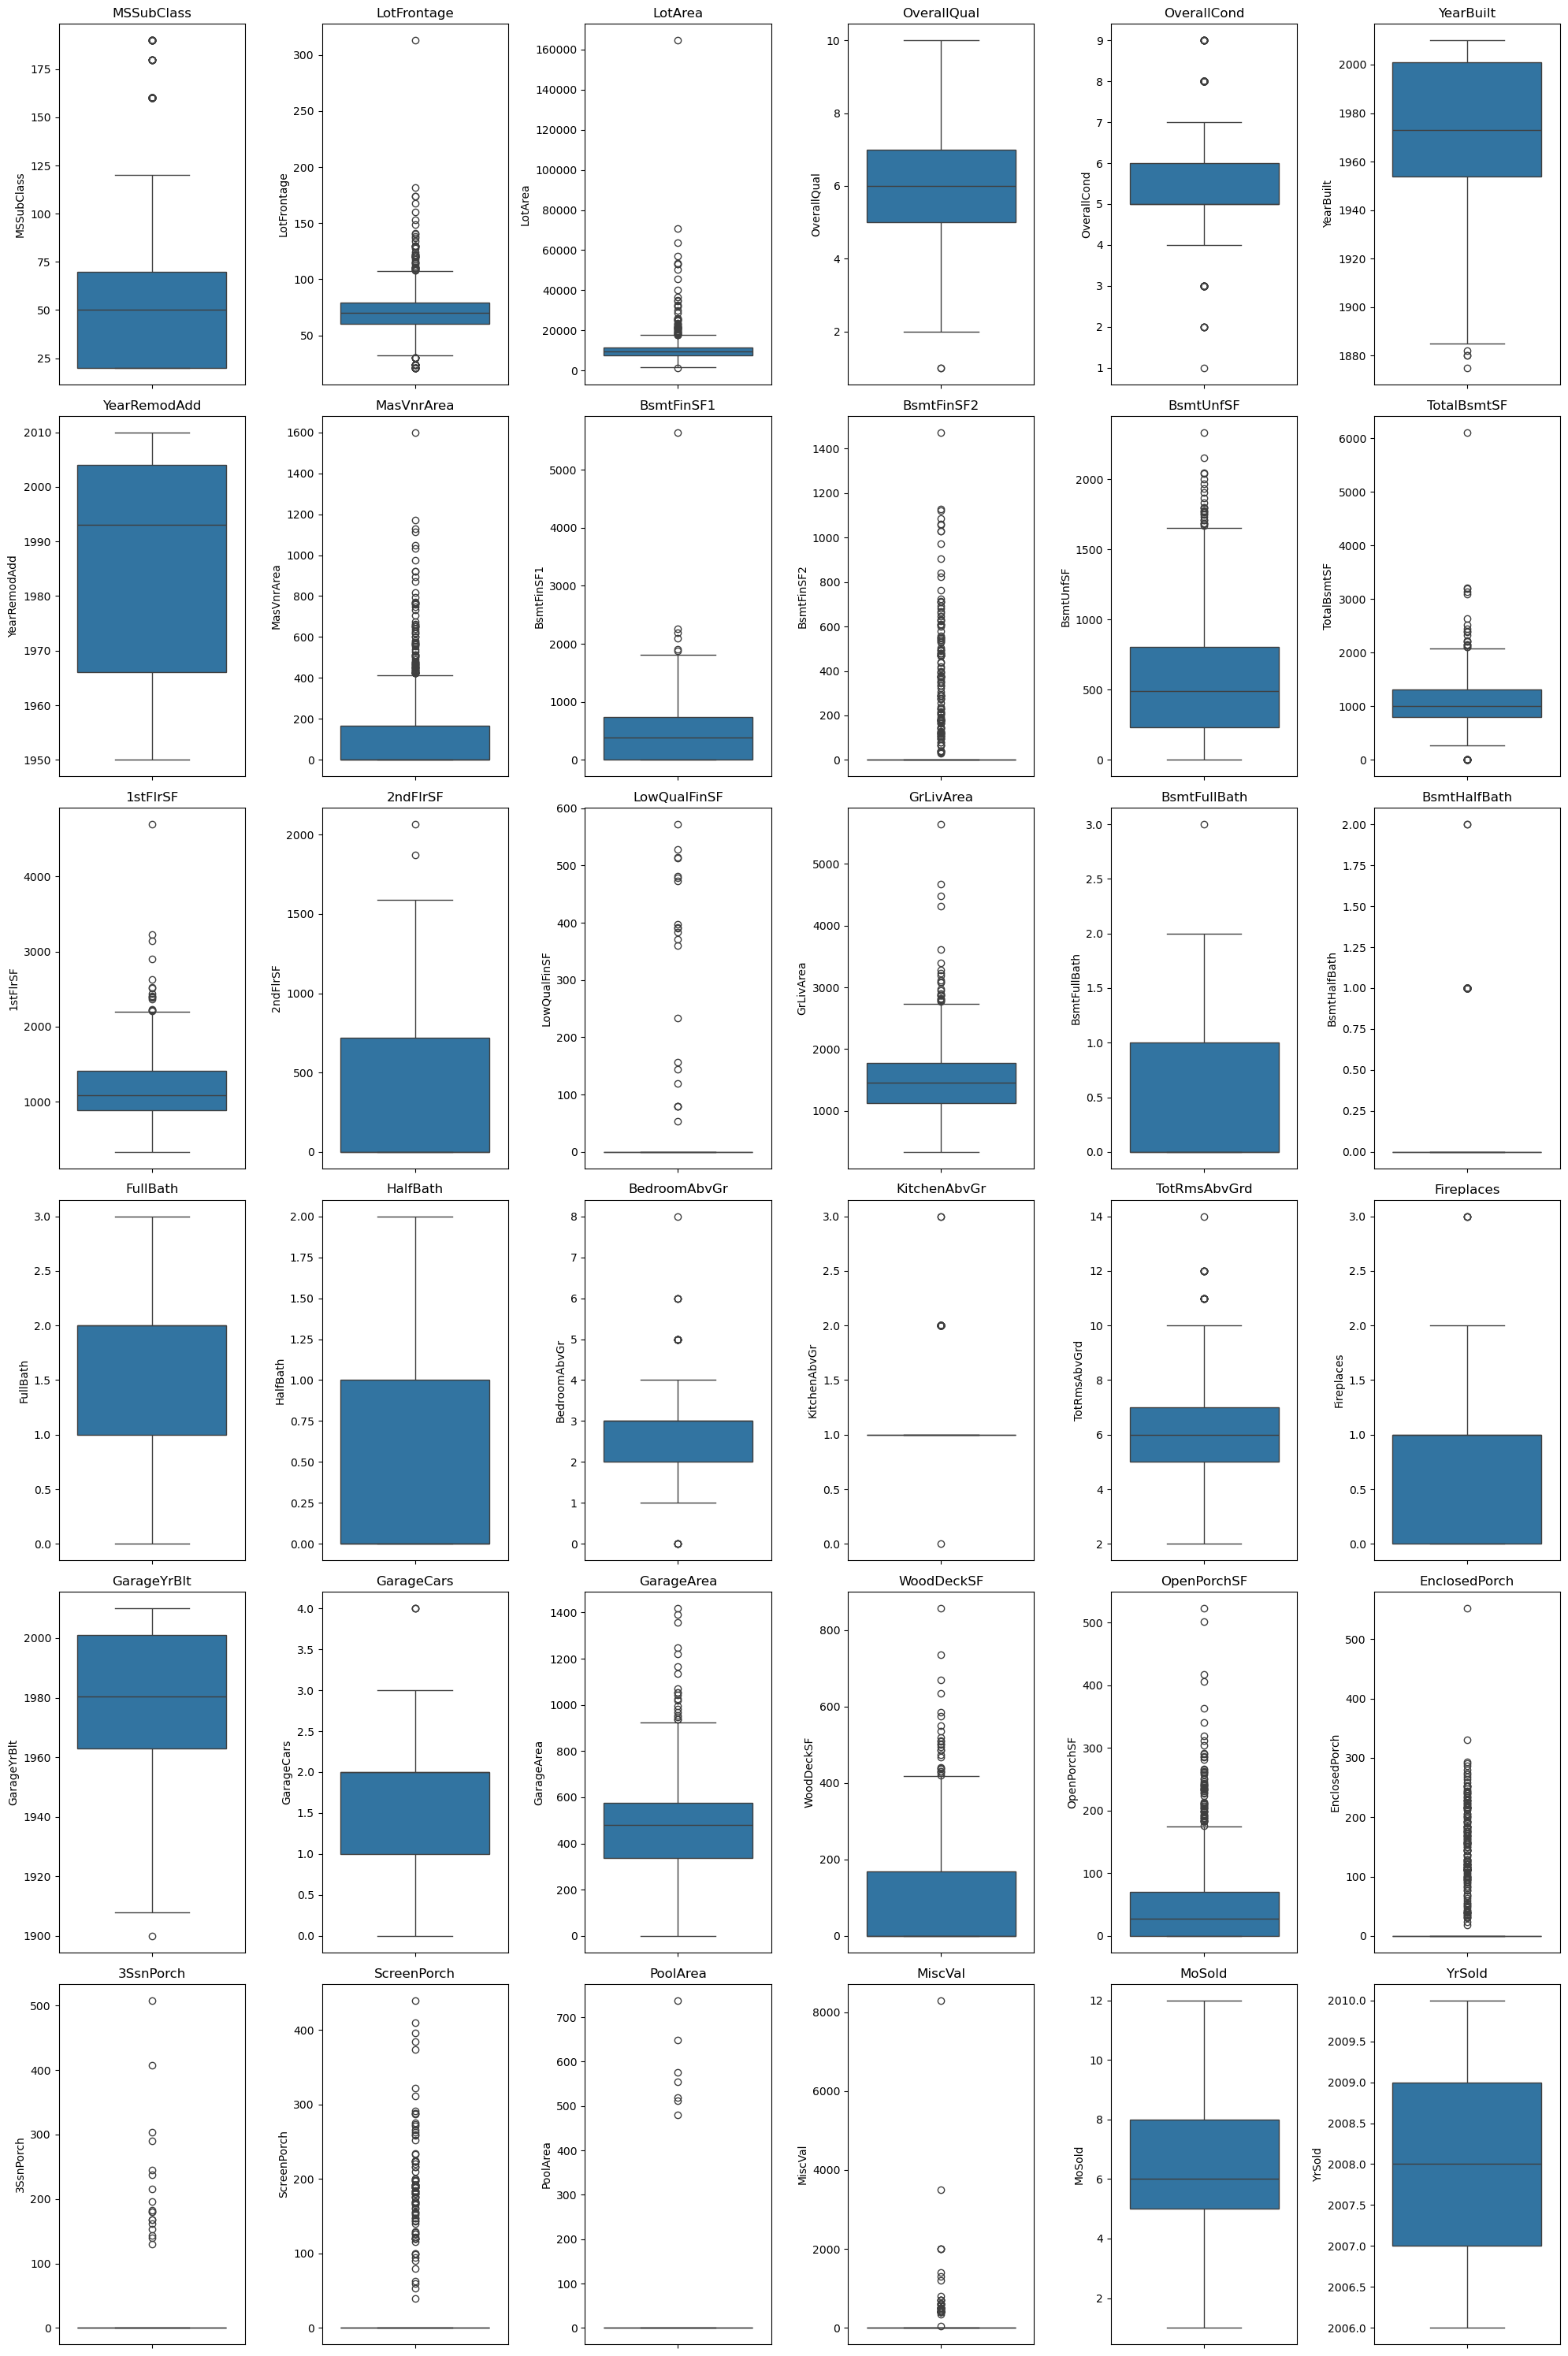

In [501]:
# смотрим выбросы 
num_cols_train = [col for col in num_cols_train if col not in ['Id', 'SalePrice']]

n_cols = 6
n_rows = (len(num_cols_train) + n_cols - 1) // n_cols 

plt.figure(figsize=(20, 5*n_rows))

for i, col in enumerate(num_cols_train, 1):
    plt.subplot(n_rows, n_cols, i)  
    sns.boxplot(y=train_data[col])
    plt.title(col[:15])  
    
plt.tight_layout()
plt.show()

In [502]:
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Собираем выбросы по всем колонкам
outliers_dict = {}
for col in num_cols_train:
    outliers = detect_outliers_iqr(train_data, col)
    if not outliers.empty:
        outliers_dict[col] = len(outliers)

print("Количество выбросов по колонкам:")
print(outliers_dict)

Количество выбросов по колонкам:
{'MSSubClass': 81, 'LotFrontage': 83, 'LotArea': 49, 'OverallQual': 2, 'OverallCond': 94, 'YearBuilt': 4, 'MasVnrArea': 74, 'BsmtFinSF1': 6, 'BsmtFinSF2': 131, 'BsmtUnfSF': 25, 'TotalBsmtSF': 45, '1stFlrSF': 16, '2ndFlrSF': 2, 'LowQualFinSF': 21, 'GrLivArea': 23, 'BsmtFullBath': 1, 'BsmtHalfBath': 63, 'BedroomAbvGr': 24, 'KitchenAbvGr': 55, 'TotRmsAbvGrd': 22, 'Fireplaces': 4, 'GarageYrBlt': 1, 'GarageCars': 3, 'GarageArea': 20, 'WoodDeckSF': 25, 'OpenPorchSF': 65, 'EnclosedPorch': 168, '3SsnPorch': 18, 'ScreenPorch': 92, 'PoolArea': 7, 'MiscVal': 42}


In [ ]:
def get_key_features(data, target_col='SalePrice', corr_threshold=0.3):
    corr = data.corr()[target_col].sort_values(ascending=False)
    key_features = corr[abs(corr) > corr_threshold].index.tolist()
    key_features.remove(target_col)  
    
    area_features = ['Area', 'SF', 'SqFt', 'Lot']  
    key_features = [f for f in key_features 
                   if any(term in f for term in area_features) 
                   or f in ['OverallQual', 'YearBuilt', 'GarageCars']]
    return key_features

key_columns = get_key_features(num_data)
print("Ключевые признаки для анализа выбросов:", key_columns)

Ключевые признаки для анализа выбросов: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF']


In [ ]:
#удаление выбросов train
def mark_outliers(data, columns):
    mask = pd.Series(False, index=data.index)
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        mask |= (data[col] < lower) | (data[col] > upper)
    return mask

outlier_mask = mark_outliers(train_data, key_columns)
train_data_clean = train_data[~outlier_mask]

print(f"Удалено строк: {outlier_mask.sum()}")
print(f"Осталось строк: {len(train_data_clean)}")

Удалено строк: 277
Осталось строк: 891


In [505]:
#выбросы для test удалены
def winsorize(data, columns):
    for col in columns:
        if col in data.columns:
            q1 = data[col].quantile(0.05)
            q3 = data[col].quantile(0.95)
            data[col] = np.clip(data[col], q1, q3)
    return data

train_data_clean = winsorize(train_data_clean, key_columns)
test_data_clean = winsorize(test_data, key_columns)
print(f"Тестовых строк удалено: {test_data_clean.sum()}")
print(f"Тестовых строк осталось: {len(test_data_clean)}")

Тестовых строк удалено: Id                                                           42778
MSSubClass                                                   17370
MSZoning         RLRLRLRMRLRLRMRMFVRLRLRLRLFVFVRLRLRLRLRLRLRLRL...
LotFrontage                                                20123.0
LotArea                                                    3433111
                                       ...                        
MiscVal                                                      24880
MoSold                                                        1850
YrSold                                                      586298
SaleType         ConLDCODWDWDWDWDWDWDConWDWDWDWDWDWDWDWDWDCODWD...
SaleCondition    NormalNormalNormalNormalNormalNormalAbnormlNor...
Length: 75, dtype: object
Тестовых строк осталось: 292


/tmp/ipykernel_574470/2255192983.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.clip(data[col], q1, q3)
/tmp/ipykernel_574470/2255192983.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.clip(data[col], q1, q3)
/tmp/ipykernel_574470/2255192983.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [506]:
# Используем границы из тренировочных данных
for col in key_columns:
    q1 = train_data[col].quantile(0.25)
    q3 = train_data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    test_data[col] = test_data[col].clip(lower, upper)  # Обрезаем выбросы

In [507]:
train_data['ExterQual']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1163    Gd
1164    Gd
1165    TA
1166    Gd
1167    TA
Name: ExterQual, Length: 1168, dtype: object

In [ ]:
# Вывод столбцов и колисество значений с ними
cat_cols = train_data_clean.select_dtypes(include=['object', 'category']).columns.tolist()


cat_stats = pd.DataFrame({
    'Column': cat_cols,
    'Unique_Count': [train_data_clean[col].nunique() for col in cat_cols],
    'Unique_Values': [train_data_clean[col].unique() for col in cat_cols]
})

cat_stats = cat_stats.sort_values(by='Unique_Count', ascending=False)
print(cat_stats[['Column', 'Unique_Count']])

           Column  Unique_Count
7    Neighborhood            23
15    Exterior2nd            16
14    Exterior1st            14
8      Condition1             9
36       SaleType             9
11     HouseStyle             7
23   BsmtFinType2             6
29     Functional             6
37  SaleCondition             6
31     GarageType             6
22   BsmtFinType1             6
9      Condition2             6
12      RoofStyle             6
0        MSZoning             5
34     GarageCond             5
33     GarageQual             5
30    FireplaceQu             5
25      HeatingQC             5
5       LotConfig             5
13       RoofMatl             5
17      ExterCond             5
10       BldgType             5
27     Electrical             5
18     Foundation             5
2        LotShape             4
3     LandContour             4
28    KitchenQual             4
21   BsmtExposure             4
16      ExterQual             4
20       BsmtCond             4
19      

In [509]:
print(train_data_clean['Exterior2nd'])

0       MetalSd
2       HdBoard
4       HdBoard
5       HdBoard
6       VinylSd
         ...   
1162    AsbShng
1163    VinylSd
1165    Wd Sdng
1166    VinylSd
1167    Plywood
Name: Exterior2nd, Length: 891, dtype: object


In [510]:
train_data_clean = train_data.drop(columns='Utilities')
test_data_clean = test_data.drop(columns='Utilities')

In [511]:
train_data_clean['ExterQual']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1163    Gd
1164    Gd
1165    TA
1166    Gd
1167    TA
Name: ExterQual, Length: 1168, dtype: object

In [512]:
# кодировка порядковых признаков

quality_map = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,
    np.nan: 0  # пропуски -> 0
}

cols_to_encode = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
    'HeatingQC', 'KitchenQual', 'FireplaceQu', 
    'GarageQual', 'GarageCond'
]
for col in cols_to_encode:
    print(f"Уникальные значения в '{col}': {train_data_clean[col].unique()}")
    train_data_clean[col] = train_data_clean[col].map(quality_map).fillna(0).astype(int)
    test_data_clean[col] = test_data_clean[col].map(quality_map).fillna(0).astype(int)
train_data_clean['BsmtQual']

Уникальные значения в 'ExterQual': ['TA' 'Gd' 'Ex' 'Fa']
Уникальные значения в 'ExterCond': ['TA' 'Gd' 'Fa' 'Ex' 'Po']
Уникальные значения в 'BsmtQual': ['TA' 'Ex' 'Gd' 'Fa']
Уникальные значения в 'BsmtCond': ['TA' 'Fa' 'Gd' 'Po']
Уникальные значения в 'HeatingQC': ['TA' 'Ex' 'Gd' 'Fa' 'Po']
Уникальные значения в 'KitchenQual': ['TA' 'Gd' 'Ex' 'Fa']
Уникальные значения в 'FireplaceQu': ['Gd' 'TA' 'Fa' 'Ex' 'Po']
Уникальные значения в 'GarageQual': ['TA' 'Fa' 'Gd' 'Po' 'Ex']
Уникальные значения в 'GarageCond': ['TA' 'Fa' 'Gd' 'Po' 'Ex']


0       3
1       3
2       3
3       5
4       3
       ..
1163    4
1164    3
1165    3
1166    4
1167    3
Name: BsmtQual, Length: 1168, dtype: int64

In [513]:

cat_cols = train_data_clean.select_dtypes(include=['object', 'category']).columns.tolist()

# Разделяем на две группы:
high_cardinality_cols = []  # Для целевого кодирования (>3 значений)
low_cardinality_cols = []    # Для One-Hot Encoding (≤3 значений)

for col in cat_cols:
    if train_data_clean[col].nunique() > 3:
        high_cardinality_cols.append(col)
    else:
        low_cardinality_cols.append(col)

print("Колонки для Target Encoding:", high_cardinality_cols)
print("Колонки для One-Hot Encoding:", low_cardinality_cols)

Колонки для Target Encoding: ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional', 'GarageType', 'SaleType', 'SaleCondition']
Колонки для One-Hot Encoding: ['Street', 'LandSlope', 'CentralAir', 'GarageFinish', 'PavedDrive']


In [338]:
'''cat_cols = train_data_clean.select_dtypes(include=['object', 'category']).columns.tolist()
cat_stats = pd.DataFrame({
    'Column': cat_cols,
    'Unique_Count': [train_data_clean[col].nunique() for col in cat_cols],
    'Unique_Values': [train_data_clean[col].unique() for col in cat_cols]
})

# Сортируем по количеству уникальных значений
cat_stats = cat_stats.sort_values(by='Unique_Count', ascending=False)
print(cat_stats[['Column', 'Unique_Count']])

# Выбираем столбцы, в которых 2-5 уникальных значений
cols_to_encode = cat_stats[(cat_stats['Unique_Count'] >= 2) & (cat_stats['Unique_Count'] <= 5)]['Column'].tolist()
print("Столбцы для one-hot кодирования:", cols_to_encode)

# Применяем one-hot кодирование (drop_first=True - для избежания мультиколлинеарности)
train_data_encoded = pd.get_dummies(train_data_clean, columns=cols_to_encode, drop_first=True)
test_data_encoded = pd.get_dummies(test_data_clean, columns=cols_to_encode, drop_first=True)

print("Размерность исходных данных:", train_data_clean.shape)
print("Размерность после кодирования:", train_data_encoded.shape)

print("Размерность исходных данных:", test_data_clean.shape)
print("Размерность после кодирования:", test_data_encoded.shape)'''

'cat_cols = train_data_clean.select_dtypes(include=[\'object\', \'category\']).columns.tolist()\ncat_stats = pd.DataFrame({\n    \'Column\': cat_cols,\n    \'Unique_Count\': [train_data_clean[col].nunique() for col in cat_cols],\n    \'Unique_Values\': [train_data_clean[col].unique() for col in cat_cols]\n})\n\n# Сортируем по количеству уникальных значений\ncat_stats = cat_stats.sort_values(by=\'Unique_Count\', ascending=False)\nprint(cat_stats[[\'Column\', \'Unique_Count\']])\n\n# Выбираем столбцы, в которых 2-5 уникальных значений\ncols_to_encode = cat_stats[(cat_stats[\'Unique_Count\'] >= 2) & (cat_stats[\'Unique_Count\'] <= 5)][\'Column\'].tolist()\nprint("Столбцы для one-hot кодирования:", cols_to_encode)\n\n# Применяем one-hot кодирование (drop_first=True - для избежания мультиколлинеарности)\ntrain_data_encoded = pd.get_dummies(train_data_clean, columns=cols_to_encode, drop_first=True)\ntest_data_encoded = pd.get_dummies(test_data_clean, columns=cols_to_encode, drop_first=True)\

In [ ]:

cat_cols = train_data_clean.select_dtypes(include=['object', 'category']).columns.tolist()

cat_stats = pd.DataFrame({
    'Column': cat_cols,
    'Unique_Count': [train_data_clean[col].nunique() for col in cat_cols],
    'Unique_Values': [train_data_clean[col].unique() for col in cat_cols]
}).sort_values(by='Unique_Count', ascending=False)

print(cat_stats[['Column', 'Unique_Count']])

target_encoding_cols = cat_stats[cat_stats['Unique_Count'] > 3]['Column'].tolist()
onehot_encoding_cols   = cat_stats[cat_stats['Unique_Count'] <= 3]['Column'].tolist()

print("Целевая кодировка для:", target_encoding_cols)
print("One-hot кодировка для:", onehot_encoding_cols)

# 3. Применяем целевое кодирование для столбцов с >3 уникальными значениями
for col in target_encoding_cols:

    mapping = train_data_clean.groupby(col)['SalePrice'].mean().to_dict()
    
    # Заменяем значения в тренировочном наборе
    train_data_clean[col] = train_data_clean[col].map(mapping)
    
    # Для тестовых данных: если значение не встречалось в тренировочных, подставляем общее среднее
    overall_mean = train_data_clean["SalePrice"].mean()
    test_data_clean[col] = test_data_clean[col].map(mapping).fillna(overall_mean)

# 4. Применяем one-hot кодирование для столбцов с <= 3 уникальными значениями
train_data_clean = pd.get_dummies(train_data_clean, columns=onehot_encoding_cols, drop_first=True)
test_data_clean  = pd.get_dummies(test_data_clean, columns=onehot_encoding_cols, drop_first=True)


train_data_clean, test_data_clean = train_data_clean.align(test_data_clean, join='left', axis=1, fill_value=0)

test_data_clean

           Column  Unique_Count
6    Neighborhood            25
14    Exterior2nd            16
13    Exterior1st            15
7      Condition1             9
26       SaleType             9
8      Condition2             8
10     HouseStyle             8
12       RoofMatl             7
22     Functional             7
11      RoofStyle             6
18   BsmtFinType2             6
17   BsmtFinType1             6
27  SaleCondition             6
19        Heating             6
23     GarageType             6
15     Foundation             6
0        MSZoning             5
9        BldgType             5
4       LotConfig             5
21     Electrical             5
16   BsmtExposure             4
2        LotShape             4
3     LandContour             4
5       LandSlope             3
24   GarageFinish             3
25     PavedDrive             3
1          Street             2
20     CentralAir             2
Целевая кодировка для: ['Neighborhood', 'Exterior2nd', 'Exterior1st', 'C

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,SaleCondition,SalePrice,LandSlope_Mod,LandSlope_Sev,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Street_Pave,CentralAir_Y
0,1,190,191603.632497,75.00,10382,164934.677943,180694.734615,177311.054697,146551.342541,184746.682224,...,175026.027311,0,False,False,True,False,False,True,0,True
1,2,20,191603.632497,70.00,10708,206533.673469,180694.734615,177311.054697,206361.111111,184746.682224,...,175026.027311,0,False,False,False,False,False,True,0,True
2,3,60,191603.632497,70.00,24682,208120.833333,180694.734615,222534.089552,192912.931034,191004.315789,...,175026.027311,0,False,False,False,False,False,True,0,True
3,4,160,125178.676301,42.00,3964,164934.677943,180694.734615,177311.054697,93671.428571,184746.682224,...,175026.027311,0,False,False,False,False,False,True,0,True
4,5,20,191603.632497,75.00,10125,164934.677943,180694.734615,177311.054697,158469.170732,184746.682224,...,175026.027311,0,False,False,False,True,False,True,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,160,125178.676301,40.55,2016,164934.677943,180694.734615,177311.054697,101390.000000,184746.682224,...,175026.027311,0,False,False,False,True,False,True,0,True
288,289,50,125178.676301,52.00,6240,164934.677943,180694.734615,177311.054697,119173.936170,184746.682224,...,175026.027311,0,False,False,False,True,False,False,0,False
289,290,60,191603.632497,44.00,9548,206533.673469,180694.734615,222534.089552,197844.701754,184746.682224,...,175026.027311,0,False,False,True,False,False,True,0,True
290,291,20,191603.632497,70.00,9200,206533.673469,180694.734615,222534.089552,197844.701754,184746.682224,...,175026.027311,0,False,False,False,True,False,True,0,True


In [515]:
test_data_clean = test_data_clean.drop(columns='SalePrice')

In [516]:
num_data = train_data_clean.select_dtypes(exclude=['object'])

In [517]:
correlation_with_price = num_data.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
top_correlated = correlation_with_price.head(33)
print("Топ-15 признаков с наибольшей корреляцией:")
top_correlated

Топ-15 признаков с наибольшей корреляцией:


,SalePrice
SalePrice,1.000000
OverallQual,0.794936
Neighborhood,0.734967
ExterQual,0.702839
GrLivArea,0.699296
KitchenQual,0.668112
BsmtQual,0.648456
GarageCars,0.633186
GarageArea,0.614240
TotalBsmtSF,0.613076


In [518]:
test_data_clean

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,SaleType,SaleCondition,LandSlope_Mod,LandSlope_Sev,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Street_Pave,CentralAir_Y
0,1,190,191603.632497,75.00,10382,164934.677943,180694.734615,177311.054697,146551.342541,184746.682224,...,135905.600000,175026.027311,False,False,True,False,False,True,0,True
1,2,20,191603.632497,70.00,10708,206533.673469,180694.734615,177311.054697,206361.111111,184746.682224,...,141243.939394,175026.027311,False,False,False,False,False,True,0,True
2,3,60,191603.632497,70.00,24682,208120.833333,180694.734615,222534.089552,192912.931034,191004.315789,...,173340.261599,175026.027311,False,False,False,False,False,True,0,True
3,4,160,125178.676301,42.00,3964,164934.677943,180694.734615,177311.054697,93671.428571,184746.682224,...,173340.261599,175026.027311,False,False,False,False,False,True,0,True
4,5,20,191603.632497,75.00,10125,164934.677943,180694.734615,177311.054697,158469.170732,184746.682224,...,173340.261599,175026.027311,False,False,False,True,False,True,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,160,125178.676301,40.55,2016,164934.677943,180694.734615,177311.054697,101390.000000,184746.682224,...,173340.261599,175026.027311,False,False,False,True,False,True,0,True
288,289,50,125178.676301,52.00,6240,164934.677943,180694.734615,177311.054697,119173.936170,184746.682224,...,173340.261599,175026.027311,False,False,False,True,False,False,0,False
289,290,60,191603.632497,44.00,9548,206533.673469,180694.734615,222534.089552,197844.701754,184746.682224,...,173340.261599,175026.027311,False,False,True,False,False,True,0,True
290,291,20,191603.632497,70.00,9200,206533.673469,180694.734615,222534.089552,197844.701754,184746.682224,...,173340.261599,175026.027311,False,False,False,True,False,True,0,True


In [ ]:
correlation_with_price = train_data_clean.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

top_correlated = correlation_with_price.head(33)
top_features = top_correlated.index.tolist()

print("Топ 33 признака с наибольшей корреляцией с SalePrice:")
print(top_correlated)

train_data_filtered = train_data_clean[top_features]

test_features = [col for col in top_features if col in test_data_clean.columns]
test_data_filtered = test_data_clean[test_features]

print("Размеры отфильтрованных данных:")
print("Train:", train_data_filtered.shape)
print("Test:", test_data_filtered.shape)

Топ 33 признака с наибольшей корреляцией с SalePrice:
               SalePrice
SalePrice       1.000000
OverallQual     0.794936
Neighborhood    0.734967
ExterQual       0.702839
GrLivArea       0.699296
KitchenQual     0.668112
BsmtQual        0.648456
GarageCars      0.633186
GarageArea      0.614240
TotalBsmtSF     0.613076
1stFlrSF        0.610451
FullBath        0.556587
YearBuilt       0.542835
TotRmsAbvGrd    0.531194
YearRemodAdd    0.516646
Foundation      0.512938
GarageYrBlt     0.479278
Fireplaces      0.470805
BsmtFinType1    0.449029
MasVnrArea      0.446608
HeatingQC       0.427119
GarageType      0.410715
BsmtFinSF1      0.398894
Exterior2nd     0.393138
Exterior1st     0.383725
SaleType        0.376981
SaleCondition   0.370478
BsmtExposure    0.366613
MSZoning        0.333956
LotFrontage     0.325926
WoodDeckSF      0.316417
OpenPorchSF     0.307988
2ndFlrSF        0.291527
Размеры отфильтрованных данных:
Train: (1168, 33)
Test: (292, 32)


In [520]:
train_data_filtered

,SalePrice,OverallQual,Neighborhood,ExterQual,GrLivArea,KitchenQual,BsmtQual,GarageCars,GarageArea,TotalBsmtSF,...,Exterior2nd,Exterior1st,SaleType,SaleCondition,BsmtExposure,MSZoning,LotFrontage,WoodDeckSF,OpenPorchSF,2ndFlrSF
0,148500,5,146551.342541,3,1002,3,3,2,902,1002,...,153077.534091,152986.775281,173340.261599,175026.027311,163705.289474,191603.632497,70.0,0,0,0
1,125000,5,101390.000000,3,1365,3,3,2,440,765,...,170334.719512,164629.912088,173340.261599,175026.027311,163705.289474,125178.676301,24.0,0,36,600
2,167900,6,146551.342541,3,1611,3,3,2,442,780,...,170334.719512,164629.912088,173340.261599,175026.027311,256051.094340,191603.632497,80.0,328,128,813
3,165000,6,158469.170732,3,1224,3,5,2,402,1224,...,214234.929825,213220.539024,173340.261599,175026.027311,163705.289474,125178.676301,70.0,0,304,0
4,180500,5,146551.342541,3,1152,3,3,2,484,1152,...,170334.719512,146982.798780,173340.261599,175026.027311,211840.820809,191603.632497,70.0,227,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,213500,7,197844.701754,4,1797,4,4,2,639,939,...,214234.929825,213220.539024,173340.261599,175026.027311,211840.820809,191603.632497,79.0,144,53,858
1164,118500,4,138713.000000,4,2230,3,3,1,440,795,...,144552.916667,146982.798780,173340.261599,175026.027311,163705.289474,191603.632497,60.0,0,188,795
1165,103600,6,130994.266667,3,1369,3,3,1,300,672,...,144552.916667,146982.798780,173340.261599,175026.027311,163705.289474,131662.266667,54.0,147,0,672
1166,130000,7,130994.266667,4,1708,4,4,2,380,976,...,214234.929825,213220.539024,173340.261599,175026.027311,163705.289474,125178.676301,32.0,0,40,732


In [ ]:
X_train = train_data_filtered.drop('SalePrice', axis=1)
y_train = train_data_filtered['SalePrice']
X_test = test_data_filtered.copy() 


In [522]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [523]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [524]:
train_score = model.score(X_train_scaled, y_train)
print(f"Train R² Score: {train_score:.4f}")

Train R² Score: 0.8307


In [ ]:
predictions = model.predict(X_test_scaled)

results = pd.DataFrame({
    'Id': test_data['Id'],  
    'SalePrice': predictions
})

results.to_csv('predictions.csv', index=False')

print("Предсказания сохранены в predictions.csv")

Предсказания сохранены в predictions.csv
